# -------------------------"RETAIL ORDER DATA ANALYSIS"----------------------------

# 1.Problem Statement

In [1]:
# Objective:
		# To analyze and optimize sales performance by identifying key trends, top-performing products, and 
		# growth opportunities using a dataset of sales transactions.

# 2.Data Extraction using Kaggle

In [2]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders


  0%|          | 0.00/200k [00:00<?, ?B/s]
100%|##########| 200k/200k [00:00<00:00, 236kB/s]
100%|##########| 200k/200k [00:00<00:00, 235kB/s]



License(s): CC0-1.0



In [3]:
import zipfile
import pandas as pd
import os

# Define the file paths
zip_file_path = "F://Projects//1.Retail Order Data Analysis//orders.csv.zip"  # Change to your actual zip file path
extract_folder = "F://Projects//1.Retail Order Data Analysis"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Find the extracted CSV file
csv_file = None
for file in os.listdir(extract_folder):
    if file.endswith(".csv"):
        csv_file = os.path.join(extract_folder, file)
        break

# Load the CSV file into a DataFrame
if csv_file:
    df = pd.read_csv(csv_file)
    print("Dataset loaded successfully:")
else:
    print("No CSV file found in the extracted data.")

Dataset loaded successfully:


In [4]:
df

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


# 3.Data Cleaning

## 3.1.Renaming Columns

In [5]:
df.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [6]:
df.rename(columns={
    'Order Id': 'order_id',
    'Order Date': 'order_date',
    'Ship Mode': 'ship_mode',
    'Segment': 'segment',
    'Country': 'country',
    'City': 'city',
    'State': 'state',
    'Postal Code': 'postal_code',
    'Region': 'region',
    'Category': 'category',
    'Sub Category': 'sub_category',
    'Product Id': 'product_id',
    'cost price': 'cost_price',  
    'List Price': 'list_price',
    'Quantity': 'quantity',
    'Discount Percent': 'discount_percent'
}, inplace=True)

In [7]:
df.head(2)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


## 3.2.Handling Missing Values

### 3.2.1.Replace missing numerical values with defaults like 0

In [8]:
# Count the number of Null values
df.isnull().sum()

order_id            0
order_date          0
ship_mode           1
segment             0
country             0
city                0
state               0
postal_code         0
region              0
category            0
sub_category        0
product_id          0
cost_price          0
list_price          0
quantity            0
discount_percent    0
dtype: int64

In [9]:
# Replace Null with 0
df=df.fillna(0)

In [10]:
# Check 
df.isnull().sum()

order_id            0
order_date          0
ship_mode           0
segment             0
country             0
city                0
state               0
postal_code         0
region              0
category            0
sub_category        0
product_id          0
cost_price          0
list_price          0
quantity            0
discount_percent    0
dtype: int64

### 3.2.2. Drop rows with critical missing fields

In [11]:
# To remove rows with Null values 
df.dropna(inplace=True)

## 3.3.Trimming Spaces

In [12]:
df.dtypes

order_id             int64
order_date          object
ship_mode           object
segment             object
country             object
city                object
state               object
postal_code          int64
region              object
category            object
sub_category        object
product_id          object
cost_price           int64
list_price           int64
quantity             int64
discount_percent     int64
dtype: object

In [13]:
# Remove trailing spaces only from string columns
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').map(lambda x: x.rstrip() if isinstance(x, str) else x)

## 3.4.Deriving new columns

In [14]:
df.head(2)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3


In [15]:
df["discount_amount"] = ((df["discount_percent"] / 100) * df["list_price"])
df["sale_price"] = (df["list_price"] - df["discount_amount"])
df["total_revenue"] = (df["sale_price"] * df["quantity"])
df["total_cost"] = (df["cost_price"] * df["quantity"])
df["profit"] = (df["total_revenue"] - df["total_cost"])

In [16]:
df.head(2)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,...,product_id,cost_price,list_price,quantity,discount_percent,discount_amount,sale_price,total_revenue,total_cost,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,240,260,2,2,5.2,254.8,509.6,480,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,600,730,3,3,21.9,708.1,2124.3,1800,324.3


# 4.Automated data loading in to MySQL database

In [17]:
import pandas as pd
import pymysql

# Establishing the connection
conn = pymysql.connect(
    host='localhost',  # e.g., 'localhost'
    user='root',  #e.g.root
    password='root',
    database='retail_orders'
)

cursor = conn.cursor()

# Create the table
create_table_query = """
CREATE TABLE IF NOT EXISTS ro_table (
					order_id              BIGINT,
					order_date           DATE,
					ship_mode            VARCHAR(50),
					segment              VARCHAR(50),
					country              VARCHAR(100),
					city                 VARCHAR(100),
					state                VARCHAR(100),
					postal_code          BIGINT,
					region               VARCHAR(50),
					category             VARCHAR(50),
					sub_category         VARCHAR(50),
					product_id           VARCHAR(50),
					cost_price           BIGINT,
					list_price           BIGINT,
					quantity             INT,
					discount_percent     INT,
					discount_amount      DECIMAL(10,2),
					sale_price           DECIMAL(10,2),
					total_revenue        DECIMAL(10,2),
					total_cost           BIGINT,
					profit              DECIMAL(10,2)
)
"""
cursor.execute(create_table_query)
conn.commit()

# Define the insert query
insert_query = """
INSERT INTO ro_table (
    order_id, order_date, ship_mode, segment, country, city, state, postal_code, 
    region, category, sub_category, product_id, cost_price, list_price, quantity, 
    discount_percent, discount_amount, sale_price, total_revenue, total_cost, profit
) 
VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
)
"""

# Iterate over the DataFrame and insert each row
for index, row in df.iterrows():
    cursor.execute(insert_query, (
    row['order_id'], row['order_date'], row['ship_mode'], row['segment'], row['country'], 
    row['city'], row['state'], row['postal_code'], row['region'], row['category'], 
    row['sub_category'], row['product_id'], row['cost_price'], row['list_price'], 
    row['quantity'], row['discount_percent'], row['discount_amount'], row['sale_price'], 
    row['total_revenue'], row['total_cost'], row['profit']
))

# Commit the transaction
conn.commit()
print("Data inserted successfully!")

Data inserted successfully!


# 5.Business Insights through SQL Queries

In [102]:
df.head(2)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,...,product_id,cost_price,list_price,quantity,discount_percent,discount_amount,sale_price,total_revenue,total_cost,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,240,260,2,2,5.2,254.8,509.6,480,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,600,730,3,3,21.9,708.1,2124.3,1800,324.3


#### 1.Top-Selling Products

In [ ]:
# Identify the products that generate the highest revenue based on sale prices.
SELECT product_id, sub_category, category, sum(total_revenue) AS total_sales
FROM ro_table
GROUP BY product_id, sub_category, category
ORDER BY total_sales desc
LIMIT 5;

#### 2.Monthly Sales Analysis

In [ ]:
# Compare year-over-year sales to identify growth or decline in certain months.
SELECT 
    YEAR(order_date) AS year,
    MONTH(order_date) AS month,
    SUM(total_revenue) AS monthly_sales
FROM ro_table
GROUP BY YEAR(order_date), MONTH(order_date)
ORDER BY month,year;

#### 3.Product Performance

In [ ]:
# Use functions like GROUP BY, HAVING, ROW_NUMBER(), and CASE WHEN to categorize and rank products by their revenue, profit margin, etc.
WITH ProductPerformance AS (
    SELECT 
        product_id, 
        sub_category, 
        category, 
        SUM(total_revenue) AS total_sales,
        SUM(profit) AS total_profit,
        (SUM(profit) / NULLIF(SUM(total_revenue), 0)) * 100 AS profit_margin,
        
        -- Categorizing Products Based on Sales
        CASE 
            WHEN SUM(total_revenue) > 5000 THEN 'High Performer'
            WHEN SUM(total_revenue) BETWEEN 1000 AND 5000 THEN 'Moderate Performer'
            ELSE 'Low Performer'
        END AS performance_category,

        ROW_NUMBER() OVER (ORDER BY SUM(total_revenue) DESC) AS revenue_rank,
        ROW_NUMBER() OVER (ORDER BY SUM(profit) DESC) AS profit_rank
    FROM ro_table
    GROUP BY product_id, sub_category, category
)
SELECT * FROM ProductPerformance
ORDER BY revenue_rank;

#### 4.Regional Sales Analysis

In [ ]:
# Query sales data by region to identify which areas are performing best.
SELECT 
    region,
    SUM(total_revenue) AS total_sales,
    SUM(profit) AS total_profit,
    COUNT(DISTINCT order_id) AS total_orders,
    ROUND((SUM(profit) / NULLIF(SUM(total_revenue), 0)) * 100, 2) AS profit_margin
FROM ro_table
GROUP BY region
ORDER BY total_sales DESC;

#### 5.Discount Analysis

In [ ]:
# Identify products with discounts greater than 4% and calculate the impact of discounts on sales.
WITH DiscountedSales AS (
    SELECT 
        product_id, 
        sub_category, 
        category, 
        SUM(total_revenue) AS total_sales,
        SUM(profit) AS total_profit,
        COUNT(order_id) AS total_orders,
        ROUND((SUM(profit) / NULLIF(SUM(total_revenue), 0)) * 100, 2) AS profit_margin,
        discount_percent,
        
        -- Categorizing Discount Levels
        CASE 
            WHEN discount_percent > 4 THEN 'High Discount (>4%)'
            WHEN discount_percent BETWEEN 3 AND 4 THEN 'Medium Discount (3-4%)'
            ELSE 'Low Discount (<3%)'
        END AS discount_category
    FROM ro_table
    GROUP BY product_id, sub_category, category, discount_percent
)
SELECT * FROM DiscountedSales
ORDER BY discount_percent DESC, total_sales DESC;

# 6.Given 10 Queries(without using joints)

#### 1. Find the top 10 highest revenue-generating products

In [ ]:
SELECT product_id, SUM(total_revenue) AS total_revenue
FROM ro_table
GROUP BY product_id
ORDER BY total_revenue DESC
LIMIT 10;

#### 2. Find the top 5 cities with the highest profit margins

In [ ]:
SELECT city, (SUM(profit) / SUM(total_revenue)) * 100 AS profit_margin
FROM ro_table
GROUP BY city
ORDER BY profit_margin DESC
LIMIT 5;

#### 3. Calculate the total discount given for each category

In [ ]:
SELECT category, SUM(discount_amount) AS total_discount
FROM ro_table
GROUP BY category;

#### 4. Find the average sale price per product category

In [ ]:
SELECT category, AVG(sale_price) AS avg_sale_price
FROM ro_table
GROUP BY category;

#### 5. Find the region with the highest average sale price

In [ ]:
SELECT region, AVG(sale_price) AS avg_sale_price
FROM ro_table
GROUP BY region
ORDER BY avg_sale_price DESC
LIMIT 1;

#### 6. Find the total profit per category

In [ ]:
SELECT category, SUM(profit) AS total_profit
FROM ro_table
GROUP BY category;

#### 7. Identify the top 3 segments with the highest quantity of orders

In [ ]:
SELECT segment, SUM(quantity) AS total_quantity
FROM ro_table
GROUP BY segment
ORDER BY total_quantity DESC
LIMIT 3;

#### 8. Determine the average discount percentage given per region

In [ ]:
SELECT region, AVG(discount_percent) AS avg_discount
FROM ro_table
GROUP BY region;

#### 9. Find the product category with the highest total profit

In [ ]:
SELECT category, SUM(profit) AS total_profit
FROM ro_table
GROUP BY category
ORDER BY total_profit DESC
LIMIT 1;

#### 10. Calculate the total revenue generated per year

In [ ]:
SELECT YEAR(order_date) AS year, SUM(total_revenue) AS total_revenue
FROM ro_table
GROUP BY YEAR(order_date)
ORDER BY year;

# 7.Using Streamlit (Given 10 Queries)

In [ ]:
import streamlit as st
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

def get_data(query):
    # Connect to database (Replace with your actual database connection)
    conn = pymysql.connect(host="localhost", user="root", password="root", database="retail_orders")
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Define query dictionary
queries = {
    "1. Top 10 highest revenue-generating products": "SELECT product_id, SUM(total_revenue) AS total_revenue FROM ro_table GROUP BY product_id ORDER BY total_revenue DESC LIMIT 10;",
    "2. Top 5 cities with highest profit margins": "SELECT city, (SUM(profit) / SUM(total_revenue)) * 100 AS profit_margin FROM ro_table GROUP BY city ORDER BY profit_margin DESC LIMIT 5;",
    "3. Total discount given for each category": "SELECT category, SUM(discount_amount) AS total_discount FROM ro_table GROUP BY category;",
    "4. Average sale price per product category": "SELECT category, AVG(sale_price) AS avg_sale_price FROM ro_table GROUP BY category;",
    "5. Region with the highest average sale price": "SELECT region, AVG(sale_price) AS avg_sale_price FROM ro_table GROUP BY region ORDER BY avg_sale_price DESC LIMIT 1;",
    "6. Total profit per category": "SELECT category, SUM(profit) AS total_profit FROM ro_table GROUP BY category;",
    "7. Top 3 segments with highest quantity of orders": "SELECT segment, SUM(quantity) AS total_quantity FROM ro_table GROUP BY segment ORDER BY total_quantity DESC LIMIT 3;",
    "8. Average discount percentage given per region": "SELECT region, AVG(discount_percent) AS avg_discount FROM ro_table GROUP BY region;",
    "9. Product category with highest total profit": "SELECT category, SUM(profit) AS total_profit FROM ro_table GROUP BY category ORDER BY total_profit DESC LIMIT 1;",
    "10. Total revenue generated per year": "SELECT YEAR(order_date) AS year, SUM(total_revenue) AS total_revenue FROM ro_table GROUP BY YEAR(order_date) ORDER BY year;"
}

# Streamlit App
st.title("🌟 Business Data Insights 🌟")
st.markdown("## 📊 Data Analysis Dashboard")
st.markdown("---")
st.markdown("<style>body {background-color: #f0f2f6;}</style>", unsafe_allow_html=True)

# Dropdown selection
selected_query = st.selectbox("🎯 Select a Query", list(queries.keys()))

if selected_query:
    query = queries[selected_query]
    df = get_data(query)
    
    st.subheader("📌 Query Result")
    st.dataframe(df.style.set_properties(**{'background-color': '#e8f4fc', 'color': 'black', 'border-color': 'white'}))
    
    # Visualization
    st.subheader("🎨 Visualization")
    sns.set_palette("pastel")  # Set color palette
    
    if "revenue" in selected_query.lower() or "profit" in selected_query.lower():
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(data=df, x=df.columns[0], y=df.columns[1], ax=ax, palette="coolwarm")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        ax.set_title(selected_query, fontsize=14, color="blue")
        ax.set_ylabel("Value", fontsize=12, color="darkred")
        st.pyplot(fig)
    
    elif "discount" in selected_query.lower():
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.pie(df[df.columns[1]], labels=df[df.columns[0]], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
        ax.set_title(selected_query, fontsize=14, color="purple")
        st.pyplot(fig)
    
    else:
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(data=df, x=df.columns[0], y=df.columns[1], ax=ax, palette="viridis")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        ax.set_title(selected_query, fontsize=14, color="green")
        ax.set_ylabel("Value", fontsize=12, color="darkblue")
        st.pyplot(fig)


# 8.Splitting df in to 2 tables(orders and products) with PK and FK

In [24]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,...,product_id,cost_price,list_price,quantity,discount_percent,discount_amount,sale_price,total_revenue,total_cost,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,240,260,2,2,5.2,254.8,509.6,480,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,600,730,3,3,21.9,708.1,2124.3,1800,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,OFF-LA-10000240,10,10,2,5,0.5,9.5,19.0,20,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,FUR-TA-10000577,780,960,5,2,19.2,940.8,4704.0,3900,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,OFF-ST-10000760,20,20,2,5,1.0,19.0,38.0,40,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,...,FUR-FU-10001889,30,30,3,4,1.2,28.8,86.4,90,-3.6
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,...,FUR-FU-10000747,70,90,2,4,3.6,86.4,172.8,140,32.8
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,...,TEC-PH-10003645,220,260,2,2,5.2,254.8,509.6,440,69.6
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,...,OFF-PA-10004041,30,30,4,3,0.9,29.1,116.4,120,-3.6


## 1.Create Table 1: orders

In [25]:
orders_table = df[['order_id', 'order_date', 'ship_mode', 'segment', 'country', 
                   'city', 'state', 'postal_code', 'region', 'product_id', 'quantity']].drop_duplicates()

## 2.Create Table 2: products

In [26]:
products_table = df[['product_id', 'category', 'sub_category', 'cost_price', 'list_price', 
                     'discount_percent', 'discount_amount', 'sale_price', 
                     'total_revenue', 'total_cost', 'profit']].drop_duplicates()

## 3.Ensure primary key column contain only unique values

In [27]:
# Drop duplicate values based on a specific column (e.g., 'name') and keep the first occurrence
products_table = products_table.drop_duplicates(subset=['product_id'], keep='first')

# Reset index after dropping duplicates
products_table.reset_index(drop=True, inplace=True)


## 4.Automated data loading in to MySQL database

### 1.Products table

In [28]:
import pandas as pd
import pymysql

# Establish the connection
conn = pymysql.connect(
    host='localhost',  # Change if needed
    user='root',  # Change if needed
    password='root',  # Change if needed
    database='retail_orders'
)

cursor = conn.cursor()

# Create the 'products' table with product_id as the PRIMARY KEY
create_table_query = """
CREATE TABLE IF NOT EXISTS products (
    product_id        VARCHAR(50) PRIMARY KEY,
    category         VARCHAR(50),
    sub_category     VARCHAR(50),
    cost_price       BIGINT,
    list_price       BIGINT,
    discount_percent INT,
    discount_amount  DECIMAL(10,2),
    sale_price       DECIMAL(10,2),
    total_revenue    DECIMAL(10,2),
    total_cost       BIGINT,
    profit          DECIMAL(10,2)
)
"""

cursor.execute(create_table_query)
conn.commit()

# Define the insert query
insert_query = """
INSERT INTO products (
    product_id, category, sub_category, cost_price, list_price, discount_percent, 
    discount_amount, sale_price, total_revenue, total_cost, profit
) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Iterate over the DataFrame and insert each row
for index, row in products_table.iterrows():
    cursor.execute(insert_query, (
            row['product_id'], row['category'], row['sub_category'], row['cost_price'], 
            row['list_price'], row['discount_percent'], row['discount_amount'], 
            row['sale_price'], row['total_revenue'], row['total_cost'], row['profit']
))
conn.commit()
print("'products' table inserted in to MySQL successfully!")


'products' table inserted in to MySQL successfully!


### 2.Orders table

In [29]:
import pandas as pd
import pymysql

# Establish the connection
conn = pymysql.connect(
    host='localhost',  # Change if needed
    user='root',  # Change if needed
    password='root',  # Change if needed
    database='retail_orders'
)

cursor = conn.cursor()

# Create the table with primary and foreign key constraints
create_table_query = """
CREATE TABLE IF NOT EXISTS orders (
    order_id        BIGINT PRIMARY KEY,
    order_date      DATE,
    ship_mode       VARCHAR(50),
    segment         VARCHAR(50),
    country         VARCHAR(100),
    city           VARCHAR(100),
    state          VARCHAR(100),
    postal_code    BIGINT,
    region         VARCHAR(50),
    product_id     VARCHAR(50),
    quantity       INT,
    FOREIGN KEY (product_id) REFERENCES products(product_id)
)
"""

cursor.execute(create_table_query)
conn.commit()

# Define the insert query
insert_query = """
INSERT INTO orders (
    order_id, order_date, ship_mode, segment, country, city, state, postal_code, 
    region, product_id, quantity
) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Iterate over the DataFrame and insert each row
for index, row in orders_table.iterrows():
    cursor.execute(insert_query, (
            row['order_id'], row['order_date'], row['ship_mode'], row['segment'], 
            row['country'], row['city'], row['state'], row['postal_code'], row['region'], 
            row['product_id'], row['quantity']
))
conn.commit()
print("'orders' table inserted in to MySQL successfully!")


'orders' table inserted in to MySQL successfully!


## 5.Saving in our Local

### 1.Orders table

In [30]:
# Save in local
orders_table.to_csv(f"F://Projects//1.Retail Order Data Analysis//orders_table.csv")

### 2.Products table

In [31]:
# Save in local
products_table.to_csv(f"F://Projects//1.Retail Order Data Analysis//products_table.csv")

## 6.EER(Enhanced Entity-Relationship) Diagram

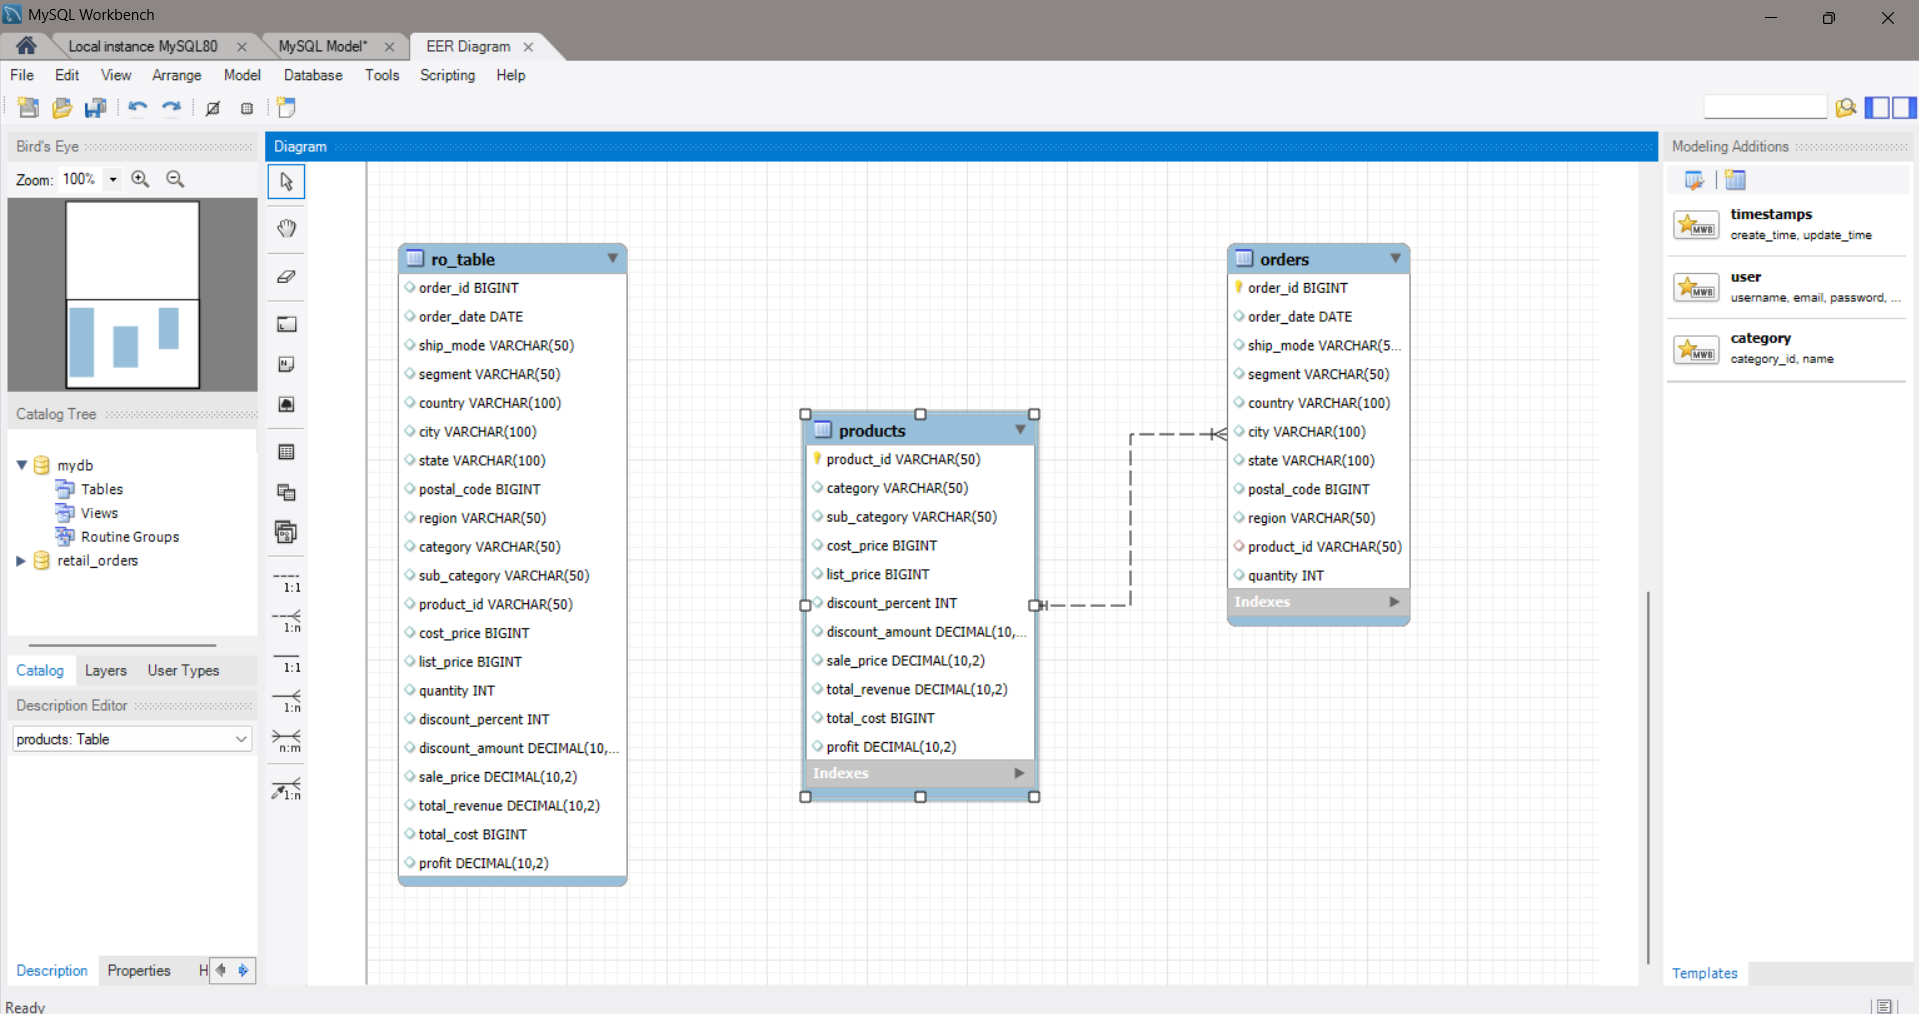

# 9.Custom-Created 20 Queries(using joints)

## 1.Same 10 Questions

### 1. Find the top 10 highest revenue-generating products

In [ ]:
SELECT p.product_id, SUM(p.total_revenue) AS total_revenue
FROM products p
JOIN orders o ON p.product_id = o.product_id
GROUP BY p.product_id
ORDER BY total_revenue DESC
LIMIT 10;

### 2. Find the top 5 cities with the highest profit margins

In [ ]:
SELECT o.city, (SUM(p.profit) / SUM(p.total_revenue)) * 100 AS profit_margin
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.city
ORDER BY profit_margin DESC
LIMIT 5;

### 3. Calculate the total discount given for each category

In [ ]:
SELECT p.category, SUM(p.discount_amount) AS total_discount
FROM products p
GROUP BY p.category;

### 4. Find the average sale price per product category

In [ ]:
SELECT p.category, AVG(p.sale_price) AS avg_sale_price
FROM products p
GROUP BY p.category;

### 5. Find the region with the highest average sale price

In [ ]:
SELECT o.region, AVG(p.sale_price) AS avg_sale_price
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.region
ORDER BY avg_sale_price DESC
LIMIT 1;

### 6. Find the total profit per category

In [ ]:
SELECT p.category, SUM(p.profit) AS total_profit
FROM products p
GROUP BY p.category;

### 7. Identify the top 3 segments with the highest quantity of orders

In [ ]:
SELECT o.segment, SUM(o.quantity) AS total_quantity
FROM orders o
GROUP BY o.segment
ORDER BY total_quantity DESC
LIMIT 3;

### 8. Determine the average discount percentage given per region

In [ ]:
SELECT o.region, AVG(p.discount_percent) AS avg_discount
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.region;

### 9. Find the product category with the highest total profit

In [ ]:
SELECT p.category, SUM(p.profit) AS total_profit
FROM products p
GROUP BY p.category
ORDER BY total_profit DESC
LIMIT 1;

### 10. Calculate the total revenue generated per year

In [ ]:
SELECT YEAR(o.order_date) AS year, SUM(p.total_revenue) AS total_revenue
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY YEAR(o.order_date)
ORDER BY year;

## 2.Own 10 Questions

### 11. Find the top 5 products with the highest discount percentage relative to their list price

In [ ]:
SELECT p.product_id, p.category, p.sub_category, 
       (p.discount_amount / p.list_price) * 100 AS discount_ratio
FROM products p
ORDER BY discount_ratio DESC
LIMIT 5;

### 12. Find the month with the highest total revenue and the category contributing most to that revenue

In [ ]:
SELECT MONTH(o.order_date) AS month, p.category, SUM(p.total_revenue) AS total_revenue
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY month, p.category
ORDER BY total_revenue DESC
LIMIT 1;

### 13. Find the city with the highest average profit per order

In [ ]:
SELECT o.city, AVG(p.profit) AS avg_profit_per_order
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.city
ORDER BY avg_profit_per_order DESC
LIMIT 1;

### 14. Find the top 3 states with the highest revenue growth compared to the previous year

In [ ]:
SELECT o.state, YEAR(o.order_date) AS year, 
       SUM(p.total_revenue) AS total_revenue, 
       LAG(SUM(p.total_revenue)) OVER (PARTITION BY o.state ORDER BY YEAR(o.order_date)) AS prev_year_revenue,
       (SUM(p.total_revenue) - LAG(SUM(p.total_revenue)) OVER (PARTITION BY o.state ORDER BY YEAR(o.order_date))) AS revenue_growth
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.state, year
ORDER BY revenue_growth DESC
LIMIT 3;

### 15. Find the segment with the most expensive average order (total sale price per order)

In [ ]:
SELECT o.segment, AVG(p.sale_price * o.quantity) AS avg_order_value
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.segment
ORDER BY avg_order_value DESC
LIMIT 1;

### 16. Find the top 5 most frequently ordered product categories

In [ ]:
SELECT p.category, COUNT(o.order_id) AS order_count
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY p.category
ORDER BY order_count DESC
LIMIT 5;

### 17.  Identify the top 3 states where the profit margin is below 5%

In [ ]:
SELECT o.state, (SUM(p.profit) / SUM(p.total_revenue)) * 100 AS profit_margin
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.state
HAVING profit_margin < 5
ORDER BY profit_margin ASC
LIMIT 3;

### 18. Find the top 5 customers (cities) who ordered the highest variety of different products

In [ ]:
SELECT o.city, COUNT(DISTINCT o.product_id) AS unique_products_ordered
FROM orders o
GROUP BY o.city
ORDER BY unique_products_ordered DESC
LIMIT 5;

### 19. Find the most discounted product category per region

In [ ]:
SELECT o.region, p.category, AVG(p.discount_percent) AS avg_discount
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.region, p.category
ORDER BY avg_discount DESC
LIMIT 1;

### 20. Find the top 3 cities with the highest total cost-to-revenue ratio

In [ ]:
SELECT o.city, 
       (SUM(p.total_cost) / SUM(p.total_revenue)) * 100 AS cost_to_revenue_ratio
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY o.city
ORDER BY cost_to_revenue_ratio DESC
LIMIT 3;

# 10.Using Streamlit (Own 20 Queries)

In [ ]:
import streamlit as st
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set_theme(style="whitegrid")

# Function to fetch data from MySQL
def get_data(query):
    conn = pymysql.connect(host="localhost", user="root", password="root", database="retail_orders")
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# Define all 20 queries
queries = {
    "1. Top 10 highest revenue-generating products": """SELECT p.product_id, SUM(p.total_revenue) AS total_revenue 
                                                        FROM products p 
                                                        JOIN orders o ON p.product_id = o.product_id 
                                                        GROUP BY p.product_id 
                                                        ORDER BY total_revenue DESC 
                                                        LIMIT 10;""",

    "2. Top 5 cities with highest profit margins": """SELECT o.city, (SUM(p.profit) / SUM(p.total_revenue)) * 100 AS profit_margin 
                                                       FROM orders o 
                                                       JOIN products p ON o.product_id = p.product_id 
                                                       GROUP BY o.city 
                                                       ORDER BY profit_margin DESC 
                                                       LIMIT 5;""",

    "3. Total discount given for each category": """SELECT p.category, SUM(p.discount_amount) AS total_discount 
                                                     FROM products p 
                                                     GROUP BY p.category;""",

    "4. Average sale price per product category": """SELECT p.category, AVG(p.sale_price) AS avg_sale_price 
                                                      FROM products p 
                                                      GROUP BY p.category;""",

    "5. Region with the highest average sale price": """SELECT o.region, AVG(p.sale_price) AS avg_sale_price 
                                                         FROM orders o 
                                                         JOIN products p ON o.product_id = p.product_id 
                                                         GROUP BY o.region 
                                                         ORDER BY avg_sale_price DESC 
                                                         LIMIT 1;""",

    "6. Total profit per category": """SELECT p.category, SUM(p.profit) AS total_profit 
                                       FROM products p 
                                       GROUP BY p.category;""",

    "7. Top 3 segments with highest quantity of orders": """SELECT o.segment, SUM(o.quantity) AS total_quantity 
                                                             FROM orders o 
                                                             GROUP BY o.segment 
                                                             ORDER BY total_quantity DESC 
                                                             LIMIT 3;""",

    "8. Average discount percentage given per region": """SELECT o.region, AVG(p.discount_percent) AS avg_discount 
                                                           FROM orders o 
                                                           JOIN products p ON o.product_id = p.product_id 
                                                           GROUP BY o.region;""",

    "9. Product category with highest total profit": """SELECT p.category, SUM(p.profit) AS total_profit 
                                                         FROM products p 
                                                         GROUP BY p.category 
                                                         ORDER BY total_profit DESC 
                                                         LIMIT 1;""",

    "10. Total revenue generated per year": """SELECT YEAR(o.order_date) AS year, SUM(p.total_revenue) AS total_revenue 
                                                FROM orders o 
                                                JOIN products p ON o.product_id = p.product_id 
                                                GROUP BY YEAR(o.order_date) 
                                                ORDER BY year;""",

    "11. Top 5 products with highest discount percentage": """SELECT p.product_id, p.category, p.sub_category, 
                                                                   (p.discount_amount / p.list_price) * 100 AS discount_ratio 
                                                              FROM products p 
                                                              ORDER BY discount_ratio DESC 
                                                              LIMIT 5;""",

    "12. Month with highest total revenue and top category": """SELECT MONTH(o.order_date) AS month, p.category, SUM(p.total_revenue) AS total_revenue 
                                                                 FROM orders o 
                                                                 JOIN products p ON o.product_id = p.product_id 
                                                                 GROUP BY month, p.category 
                                                                 ORDER BY total_revenue DESC 
                                                                 LIMIT 1;""",

    "13. City with highest average profit per order": """SELECT o.city, AVG(p.profit) AS avg_profit_per_order 
                                                          FROM orders o 
                                                          JOIN products p ON o.product_id = p.product_id 
                                                          GROUP BY o.city 
                                                          ORDER BY avg_profit_per_order DESC 
                                                          LIMIT 1;""",

    "14. Top 3 states with highest revenue growth": """SELECT o.state, YEAR(o.order_date) AS year, SUM(p.total_revenue) AS total_revenue, 
                                                             LAG(SUM(p.total_revenue)) OVER (PARTITION BY o.state ORDER BY YEAR(o.order_date)) AS prev_year_revenue, 
                                                             (SUM(p.total_revenue) - LAG(SUM(p.total_revenue)) OVER (PARTITION BY o.state ORDER BY YEAR(o.order_date))) AS revenue_growth 
                                                       FROM orders o 
                                                       JOIN products p ON o.product_id = p.product_id 
                                                       GROUP BY o.state, year 
                                                       ORDER BY revenue_growth DESC 
                                                       LIMIT 3;""",

    "15. Segment with most expensive average order": """SELECT o.segment, AVG(p.sale_price * o.quantity) AS avg_order_value 
                                                         FROM orders o 
                                                         JOIN products p ON o.product_id = p.product_id 
                                                         GROUP BY o.segment 
                                                         ORDER BY avg_order_value DESC 
                                                         LIMIT 1;""",

    "16. Top 5 most frequently ordered product categories": """SELECT p.category, COUNT(o.order_id) AS order_count 
                                                                FROM orders o 
                                                                JOIN products p ON o.product_id = p.product_id 
                                                                GROUP BY p.category 
                                                                ORDER BY order_count DESC 
                                                                LIMIT 5;""",

    "17. Top 3 states where profit margin is below 5%": """SELECT o.state, (SUM(p.profit) / SUM(p.total_revenue)) * 100 AS profit_margin 
                                                            FROM orders o 
                                                            JOIN products p ON o.product_id = p.product_id 
                                                            GROUP BY o.state 
                                                            HAVING profit_margin < 5 
                                                            ORDER BY profit_margin ASC 
                                                            LIMIT 3;""",

    "18. Top 5 cities with highest product variety": """SELECT o.city, COUNT(DISTINCT o.product_id) AS unique_products_ordered 
                                                        FROM orders o 
                                                        GROUP BY o.city 
                                                        ORDER BY unique_products_ordered DESC 
                                                        LIMIT 5;""",

    "19. Most discounted product category per region": """SELECT o.region, p.category, AVG(p.discount_percent) AS avg_discount 
                                                           FROM orders o 
                                                           JOIN products p ON o.product_id = p.product_id 
                                                           GROUP BY o.region, p.category 
                                                           ORDER BY avg_discount DESC 
                                                           LIMIT 1;""",

    "20. Top 3 cities with highest cost-to-revenue ratio": """SELECT o.city, (SUM(p.total_cost) / SUM(p.total_revenue)) * 100 AS cost_to_revenue_ratio 
                                                               FROM orders o 
                                                               JOIN products p ON o.product_id = p.product_id 
                                                               GROUP BY o.city 
                                                               ORDER BY cost_to_revenue_ratio DESC 
                                                               LIMIT 3;"""
}

# Streamlit App
st.title("📊 Business Data Insights Dashboard")

# Dropdown selection
selected_query = st.selectbox("🔍 Select a Query", list(queries.keys()))

if selected_query:
    query = queries[selected_query]
    df = get_data(query)

    st.subheader("📌 Query Result")
    st.dataframe(df.style.background_gradient(cmap="Blues"))

    # Visualization
    st.subheader("📊 Visualization")
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(data=df, x=df.columns[0], y=df.columns[1], palette="coolwarm", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(selected_query, fontsize=14, fontweight="bold")
    st.pyplot(fig)
